In [103]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [104]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'NAFTRACISHRS.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [105]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,43.299999,42.349998,42.450001,43.169998,34389155.0,42.003643
2019-03-21,43.430000,42.970001,43.150002,43.320000,18415417.0,42.149590
2019-03-22,43.150002,42.250000,43.049999,42.340000,37550044.0,41.196068
2019-03-25,42.840000,42.439999,42.549999,42.790001,22193273.0,41.633911
2019-03-26,43.070000,42.779999,42.820000,42.910000,15219116.0,41.750668


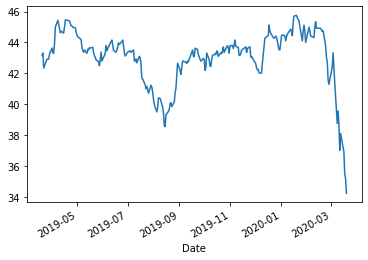

In [106]:
%matplotlib inline
data.Close.plot()

In [107]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [108]:
df = BBANDS(data,20)

In [109]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

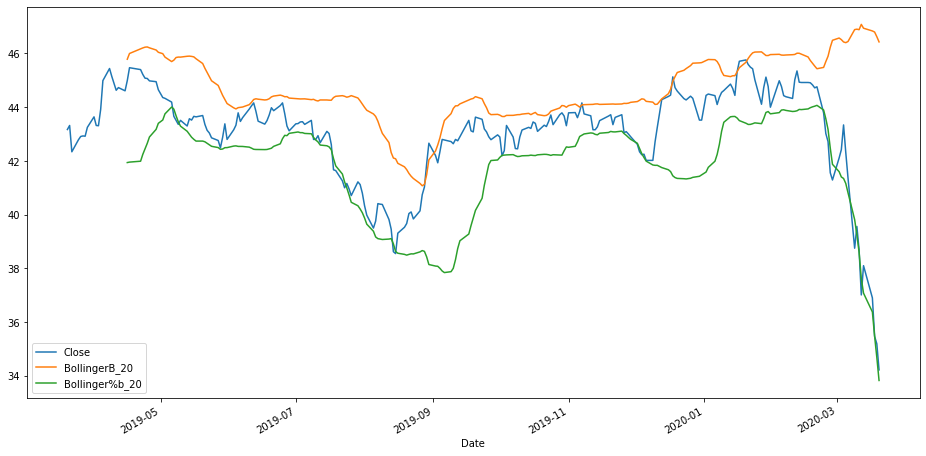

In [110]:
df2.plot(figsize = (16,8))

In [111]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [112]:
pd.set_option('display.max_rows', None)

In [113]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,43.169998,Sin informacion,-
2019-03-21,43.320000,Sin informacion,-
2019-03-22,42.340000,Sin informacion,-
2019-03-25,42.790001,Sin informacion,-
2019-03-26,42.910000,Sin informacion,-
2019-03-27,42.930000,Sin informacion,-
2019-03-28,42.919998,Sin informacion,-
2019-03-29,43.250000,Sin informacion,-
2019-04-01,43.639999,Sin informacion,-
